<a href="https://colab.research.google.com/github/andrejarenkow/geodata/blob/main/RS_por_CRS/Geodata_CRS_exemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 
     |████████████████████████████████| 6.3 MB 39.9 MB/s 


In [32]:
import folium
import json
import urllib.request
import geopandas
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
with urllib.request.urlopen("https://github.com/andrejarenkow/geodata/blob/main/municipios_rs_CRS/rs_municipios_crs.json?raw=true") as url:
    rs_municipios = json.loads(url.read().decode())

In [34]:
url = "https://github.com/andrejarenkow/geodata/blob/main/municipios_rs_CRS/rs_municipios_crs.json?raw=true"
df = geopandas.read_file(url)
df['CRS_numero'] = pd.to_numeric(df['CRS'].str.split('ª', expand=True)[0])
df

,id,name,description,IBGE6,CRS,geometry,CRS_numero
0,4300034,Aceguá,Aceguá,430003,7ª CRS,"POLYGON ((-54.11276 -31.42931, -54.09821 -31.4...",7
1,4300059,Água Santa,Água Santa,430005,6ª CRS,"POLYGON ((-52.04263 -28.11703, -52.03489 -28.1...",6
2,4300109,Agudo,Agudo,430010,4ª CRS,"POLYGON ((-53.25560 -29.44736, -53.23478 -29.4...",4
3,4300208,Ajuricaba,Ajuricaba,430020,17ª CRS,"POLYGON ((-53.78588 -28.11270, -53.78654 -28.1...",17
4,4300307,Alecrim,Alecrim,430030,14ª CRS,"POLYGON ((-54.78557 -27.57626, -54.77463 -27.5...",14
...,...,...,...,...,...,...,...
491,4323606,Vista Alegre do Prata,Vista Alegre do Prata,432360,5ª CRS,"POLYGON ((-51.76693 -28.78333, -51.76418 -28.7...",5
492,4323705,Vista Gaúcha,Vista Gaúcha,432370,2ª CRS,"POLYGON ((-53.70619 -27.20428, -53.70651 -27.2...",2
493,4323754,Vitória das Missões,Vitória das Missões,432375,12ª CRS,"POLYGON ((-54.54334 -28.26996, -54.53230 -28.2...",12
494,4323770,Westfalia,Westfalia,432377,16ª CRS,"POLYGON ((-51.69056 -29.37088, -51.69061 -29.3...",16


#Dissolve

https://www.earthdatascience.org/workshops/gis-open-source-python/dissolve-polygons-in-python-geopandas-shapely/

In [44]:
df_crs = df.dissolve(by='CRS')

nomes_sedes = ['Porto Alegre', 'Frederico Westphalen', 'Pelotas', 'Santa Maria', 'Caxias do Sul',
               'Passo Fundo', 'Bagé', 'Cachoeira do Sul', 'Cruz Alta', 'Alegrete', 'Erechim',
               'Santo Ângelo', 'Santa Cruz do Sul', 'Santa Rosa', 'Palmeira das Missões',
               'Lajeado', 'Ijuí', 'Osório']
df_crs = df_crs.reset_index()
df_crs = df_crs.sort_values('CRS_numero').reset_index(drop=True)
df_crs['name'] = nomes_sedes
df_crs['description'] = nomes_sedes

df_crs

,CRS,geometry,id,name,description,IBGE6,CRS_numero
0,1ª CRS,"POLYGON ((-51.44716 -30.87312, -51.47614 -30.8...",4300604,Porto Alegre,Porto Alegre,430060,1
1,2ª CRS,"POLYGON ((-53.11818 -27.58802, -53.12103 -27.5...",4300505,Frederico Westphalen,Frederico Westphalen,430050,2
2,3ª CRS,"MULTIPOLYGON (((-53.42269 -33.74415, -53.43277...",4300638,Pelotas,Pelotas,430063,3
3,4ª CRS,"POLYGON ((-53.84478 -30.48305, -53.85835 -30.4...",4300109,Santa Maria,Santa Maria,430010,4
4,5ª CRS,"POLYGON ((-50.85920 -29.24824, -50.85409 -29.2...",4300570,Caxias do Sul,Caxias do Sul,430057,5
5,6ª CRS,"POLYGON ((-52.22754 -28.97034, -52.22974 -28.9...",4300059,Passo Fundo,Passo Fundo,430005,6
6,7ª CRS,"POLYGON ((-53.65025 -31.33764, -53.64024 -31.3...",4300034,Bagé,Bagé,430003,7
7,8ª CRS,"POLYGON ((-52.65684 -30.20888, -52.65342 -30.2...",4301206,Cachoeira do Sul,Cachoeira do Sul,430120,8
8,9ª CRS,"POLYGON ((-53.12851 -28.98674, -53.11771 -28.9...",4302220,Cruz Alta,Cruz Alta,430222,9
9,10ª CRS,"POLYGON ((-55.01079 -30.72375, -55.01480 -30.7...",4300406,Alegrete,Alegrete,430040,10


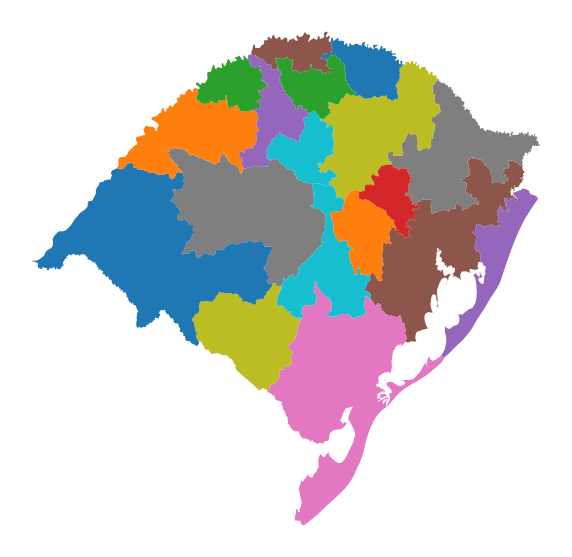

In [45]:
# create the plot
fig, ax = plt.subplots(figsize = (10,10))

# plot the data 
df_crs.reset_index().plot(column = 'CRS', ax=ax)

# Set plot axis to equal ratio
ax.set_axis_off()

plt.show()

In [46]:
df_crs.to_file('RS_por_CRS.geojson', driver='GeoJSON') 